In [9]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import StandardScaler, MinMaxScaler # normalizadores

# from sklearn.decomposition import PCA
import warnings
warnings.simplefilter('ignore')
from seaborn import heatmap
import matplotlib.pyplot as plt
#import Cleaning_fun as clfun

In [10]:
df = pd.read_csv('../Data/new_train.csv')

In [11]:
df.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,essentials,other,wifi,tv,washer,lang_var,entire_home/apt,shared_room,room_pp,private
0,10,1,100.0,75.000000,0,NaN,13,2,1,0,...,0,0,0,0,1,0,0,0,0.333333,1
1,7,2,NaN,77.531057,0,Weesperbuurt en Plantage,0,2,1,1,...,1,1,1,2,2,1,0,0,0.750000,1
2,4,0,100.0,97.000000,1,Hoofddorppleinbuurt,20,1,1,0,...,1,0,0,0,1,0,1,0,1.000000,0
3,6,0,100.0,67.000000,0,Oud-West,1,1,1,1,...,1,1,1,1,1,3,0,0,1.000000,1
4,9,1,100.0,75.000000,1,Oud-Zuid,1,2,1,0,...,1,0,2,0,1,0,0,0,1.000000,1


In [12]:
strings = []
for col in df:
    if df[col].dtypes == "object":
        strings.append(col)
df = df.drop(columns=strings)

In [13]:
df.describe()
# host response has a very large standard deviation

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,price,...,essentials,other,wifi,tv,washer,lang_var,entire_home/apt,shared_room,room_pp,private
count,3782.000000,3782.00000,2500.000000,3782.000000,3782.000000,3782.000000,3782.000000,3782.000000,3782.000000,3782.000000,...,3782.000000,3782.000000,3782.000000,3782.000000,3782.000000,3782.000000,3782.000000,3782.000000,3782.000000,3782.000000
mean,6.903755,0.97779,94.591200,77.895996,0.280011,2.371761,1.703596,0.999471,0.190111,162.869117,...,0.887097,0.505553,1.101005,1.134585,1.050238,0.535431,0.015336,0.002644,0.905942,0.982020
std,2.527341,0.85502,15.339302,25.992332,0.449063,9.739795,0.457310,0.022993,0.392441,113.314863,...,0.316516,0.500564,0.769255,0.802089,0.264468,0.733588,0.122901,0.051360,0.266345,0.132896
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.00000,100.000000,77.000000,0.000000,1.000000,1.000000,1.000000,0.000000,95.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.750000,1.000000
50%,7.000000,1.00000,100.000000,77.531057,0.000000,1.000000,2.000000,1.000000,0.000000,135.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,9.000000,2.00000,100.000000,100.000000,1.000000,2.000000,2.000000,1.000000,0.000000,199.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,14.000000,2.00000,100.000000,100.000000,1.000000,432.000000,2.000000,1.000000,1.000000,1818.000000,...,1.000000,2.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.250000,1.000000


In [14]:
a = dict(df.corr()['price'])
lista = [(k,v) for k,v in a.items() if abs(v)>0.05]
# Aqui podemos observar algunas columnas que no tienen correlacion con el precio. 
#-lista

<AxesSubplot:>

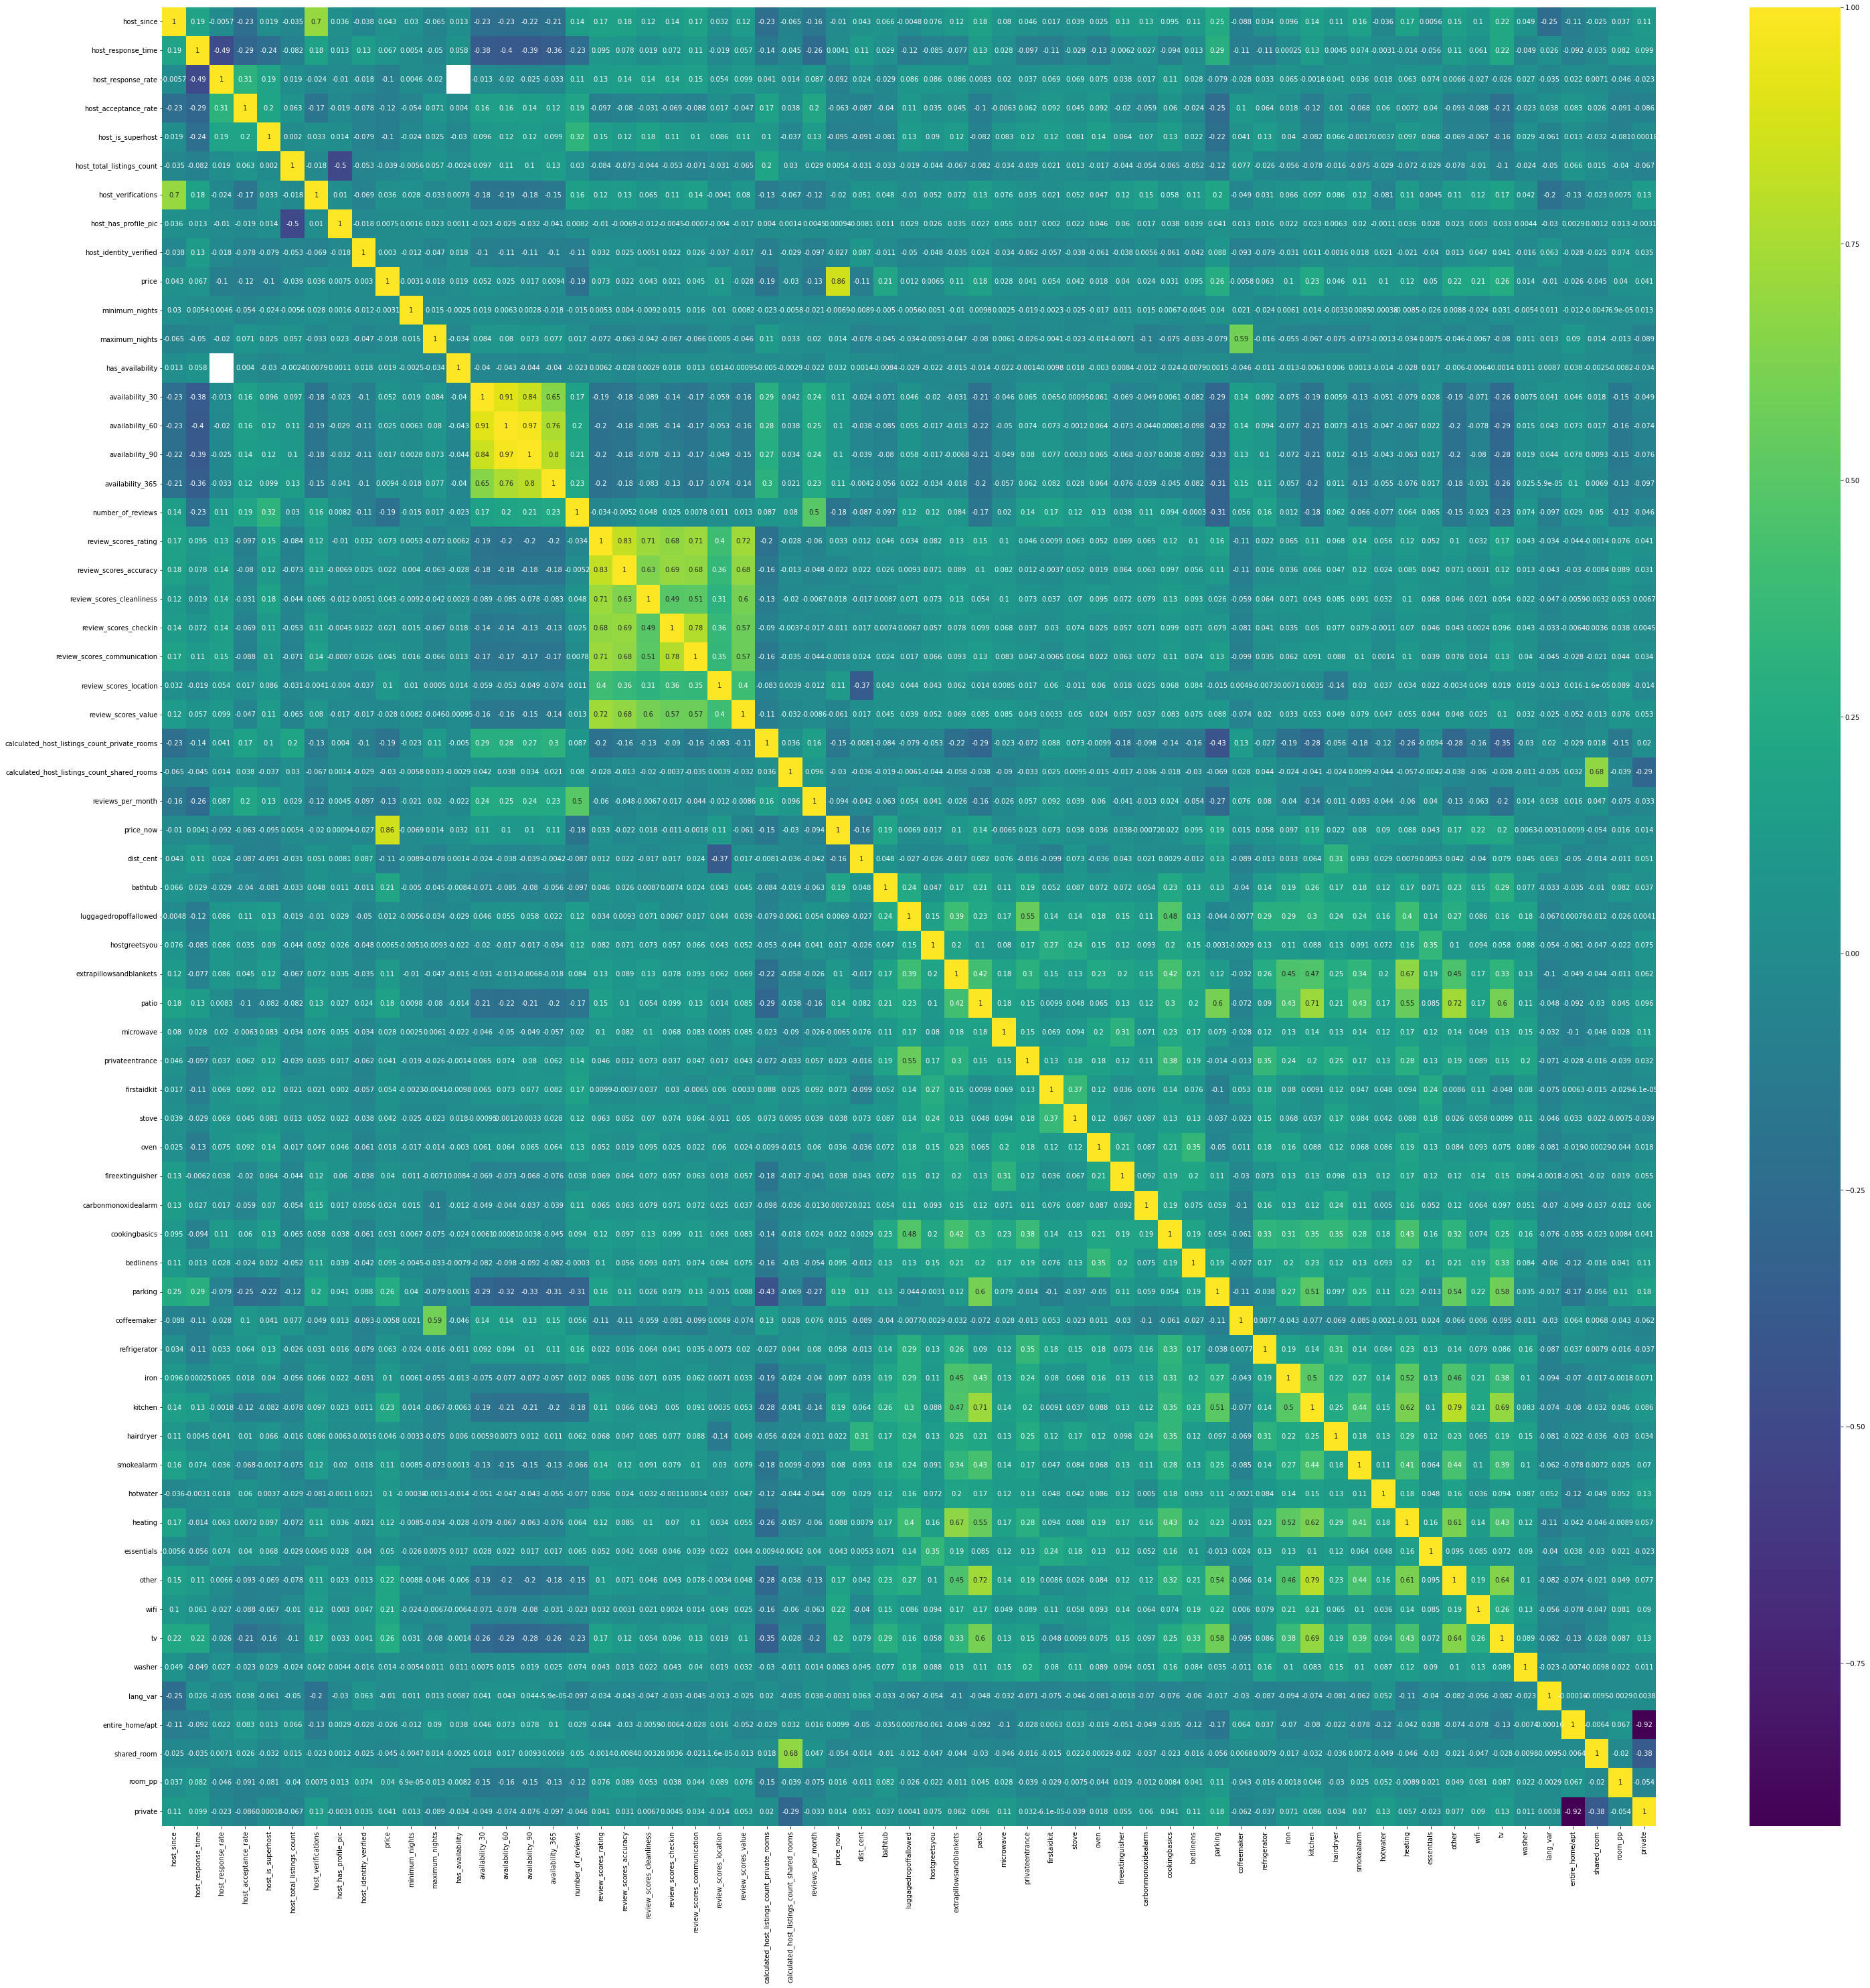

In [21]:
#sns.pairplot(df)
plt.figure(figsize=(50,50))
heatmap(df.corr(), cmap='viridis', annot=True)


In [16]:
# Here we see that there are some correlations we should avoid, the ratings is the clear example. 
# Let's drop some more columns !!!
# Things we should keep: host_is_superhostm (and maybe host acceptance rate) // We should treat longitude and latitude, bathrooms_text
#  Accomodates, aviability 365, number of reviews, reviews of location, reviews per month, private room. La resta són petables

In [17]:
# Let's create the definitive df we are going to work with:
# Host acceptance rate, host_is_superhost, (bedrooms+bathrooms_text)/accomodates, reviews_score_location,reviews_per_month,
# dist_cent, hotel_room. 

In [18]:
df.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'price_now', 'dist_cent', 'bathtub', 'luggagedropoffallowed',
       'hostgreetsyou', 'extrapillowsandblankets', 'patio', 'microwave',
       'privateentrance', 'firstaidkit', 'stove', 'oven', 'fireextinguisher',
       'carbonmonoxidealarm',

In [19]:
# clfun.num_NaNs(df_def)
# keep = ['price', 'host_acceptance_rate','host_is_superhost','review_scores_location','reviews_per_month','dist_cent','private_room','hotel_room','bedrooms','bathrooms_text','accommodates']
# df_def= df[keep]

In [20]:
df_def.shape

NameError: name 'df_def' is not defined

<AxesSubplot:>

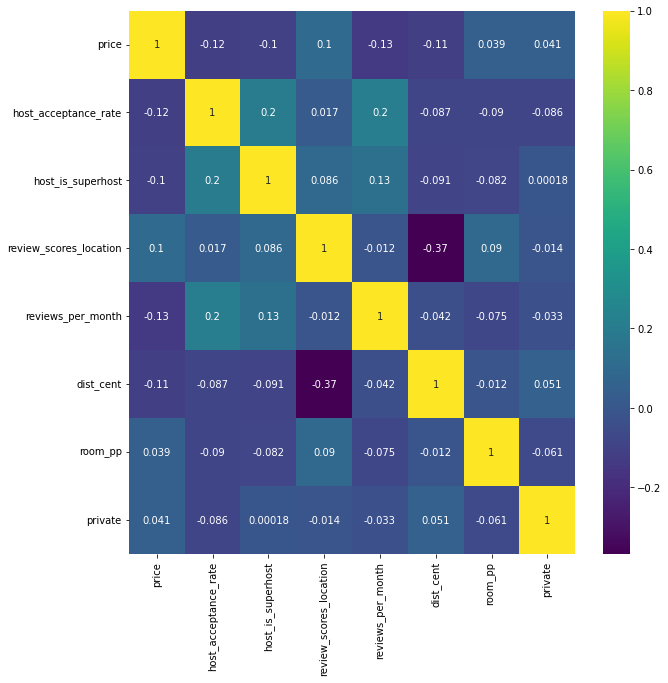

In [102]:
plt.figure(figsize=(10,10) )
heatmap(df_def.corr(), cmap='viridis', annot=True)